/tmp/ipykernel_171330/320142982.py:45: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  en_df.hist(bins=50, ax=plt.gca())
/tmp/ipykernel_171330/320142982.py:49: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  zh_df.hist(bins=50, ax=plt.gca())


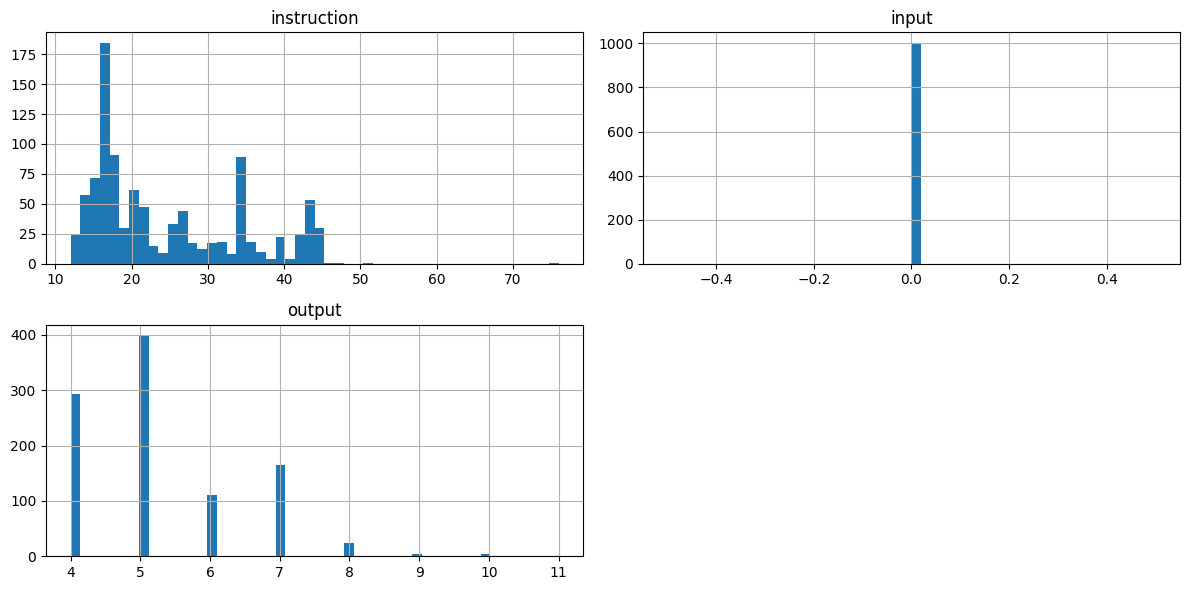

--- 英文数据集 ---
instruction 长度分位数:
count    1000.00000
mean       16.71800
std         6.52112
min         5.00000
50%        16.00000
90%        24.00000
95%        27.00000
99%        34.00000
max       129.00000
Name: instruction, dtype: float64
--------------------
input 长度分位数:
count    1000.0
mean        0.0
std         0.0
min         0.0
50%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: input, dtype: float64
--------------------
output 长度分位数:
count    1000.000000
mean       27.108000
std        38.352617
min         0.000000
50%        18.000000
90%        55.100000
95%        82.050000
99%       136.010000
max       669.000000
Name: output, dtype: float64
--------------------
--- 中文数据集 ---
instruction 长度分位数:
count    1000.000000
mean       24.666000
std         9.931318
min        12.000000
50%        20.000000
90%        42.000000
95%        43.000000
99%        45.000000
max        76.000000
Name: instruction, dtype: float64
-----------------

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sequence_lengths(file_path):

  instruction_lengths = []
  input_lengths = []
  output_lengths = []

  with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
      data = json.loads(line)
      instruction_lengths.append(len(data.get("instruction", "")))
      input_lengths.append(len(data.get("input", "")))
      output_lengths.append(len(data.get("output", "")))

  df = pd.DataFrame({
      "instruction": instruction_lengths,
      "input": input_lengths,
      "output": output_lengths
  })
  return df

en_file_path = '/root/datasetsSplitTrain/tigerbot-wiki-qa-zh-1k.jsonl'
zh_file_path = '/root/datasetsSplitTrain/tigerbot-riddle-qa-1k.jsonl'
en_df = analyze_sequence_lengths(en_file_path)
zh_df = analyze_sequence_lengths(zh_file_path)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("英文数据集序列长度分布")
en_df.hist(bins=50, ax=plt.gca())

plt.subplot(2, 1, 2)
plt.title("中文数据集序列长度分布")
zh_df.hist(bins=50, ax=plt.gca())

plt.tight_layout()
plt.show()

for df, dataset_name in [(en_df, "英文数据集"), (zh_df, "中文数据集")]:
  print(f"--- {dataset_name} ---")
  for column in df.columns:
    print(f"{column} 长度分位数:")
    print(df[column].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))
    print("-" * 20)
